# Detection of Fradulant transaction


This project is about detecting fraud transactions using machine learning model using Python packages.We are trying to understand the data first and then design a model based on the data.This model can be very useful for credit card companies as it can detect whether its fraud or not immediately after the transaction.

We need the followinng packages for designing the model

>Numpy and Pandas for analysing the data

>seaborn and pyplot for visualising the data

>Scikit learn is the ML package

In [1]:
##import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

After importing the neccesary packages we are trying to read the data from the file. The following data is downloaded from Kaggle.We can use read_csv command of pandas to load the data in to Dataframe.Once loaded into the dataframe we can get the idea of the data using the .columns() and .shape() function.

In [2]:
## load the Dateset from the file
file=pd.read_csv('creditcard.csv')
#understanding the data
print(file.columns)
print(file.shape)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(284807, 31)


If you run and see the above cell we can see 284807 entries in the file. we should now check for any missing entries in the file as it might be a useless data to work with. To do that we can use .describe() to have a rough idea of each columns

In [3]:
file.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


After running the above cell check the followig.
>check for the count which is same ,that means we dont have any missing values

>check the standard deviation amoung the columns,except amount and time all the other columns have low values indicating low ranges

>Check for min and max

After getting an idea of the dataset we are going to slice few samples from the file because we might not need the entire dataset.

In [4]:
#selecting the samples from the file to work on
data=file.sample(frac=0.1)
data.shape

(28481, 31)

After sampling to understand the data deeply we are  going to use some some of the cool features of the seaborn & pyplot packages. We are going to understand each columns using the .hist() function. It will give histogram of each column.

We can the use the correlation function to see the dependency the 'Class' column has on the other columns

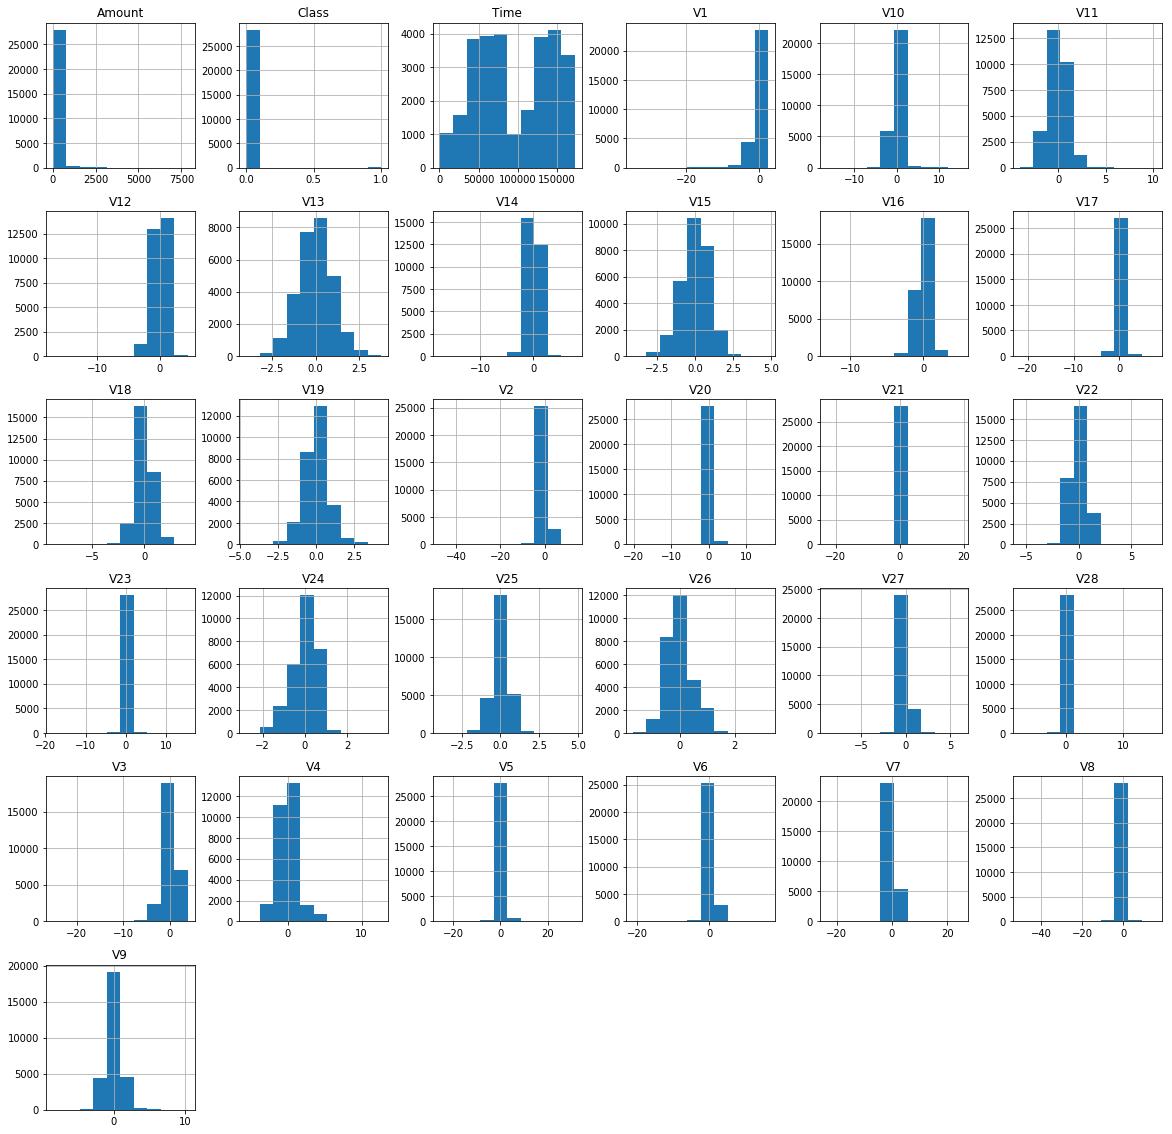

In [6]:
#no missing datas so we can skip deleting entries
data.hist(figsize=(20,20))
plt.show()

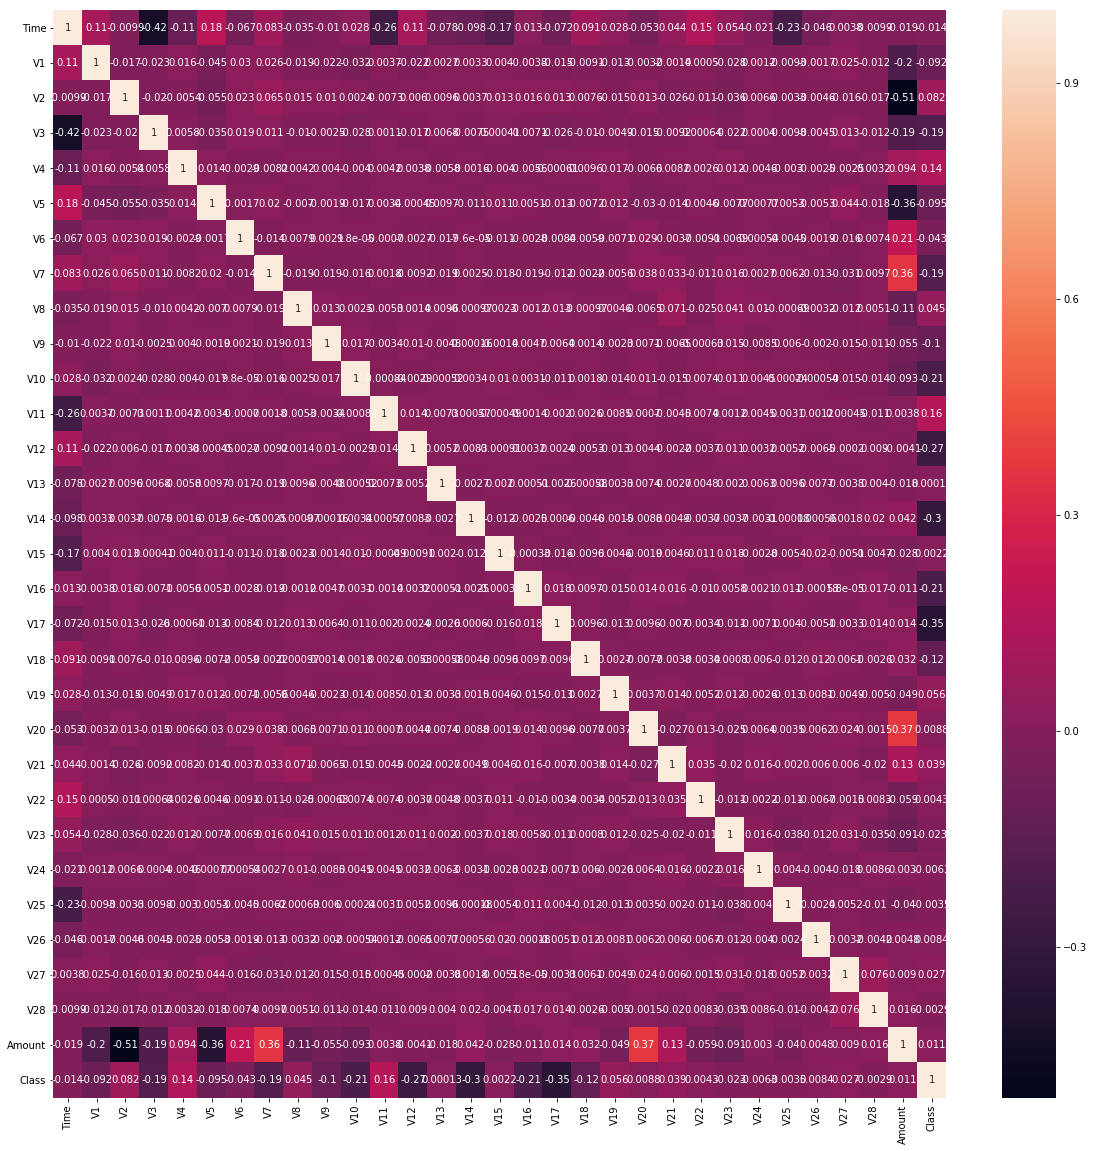

In [7]:
#check the correlation between the data
corr=data.corr()
fig=plt.figure(figsize=(20,20))
ax=sns.heatmap(corr,annot=True)

Once you run and view the graph you might figure out that the columns V19-V28 has very negligible correlation on the Class so we might not need those columns for detecting the class. (I used all the columns and tried before it brought down the performance)

So we might need to a pipeline to correct the data before it enters the model dataCorrection fucntion will drop the following columns from the data. We will use this below. 

In [8]:
##function to remove the unwanted columns
def dataCorrection(data):
    return (data.drop(columns=['V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']))

In [9]:
data1=dataCorrection(data)

Once the data correcting is done we then plot the data to get an idea of the dataset based one the Class

(0, 10000)

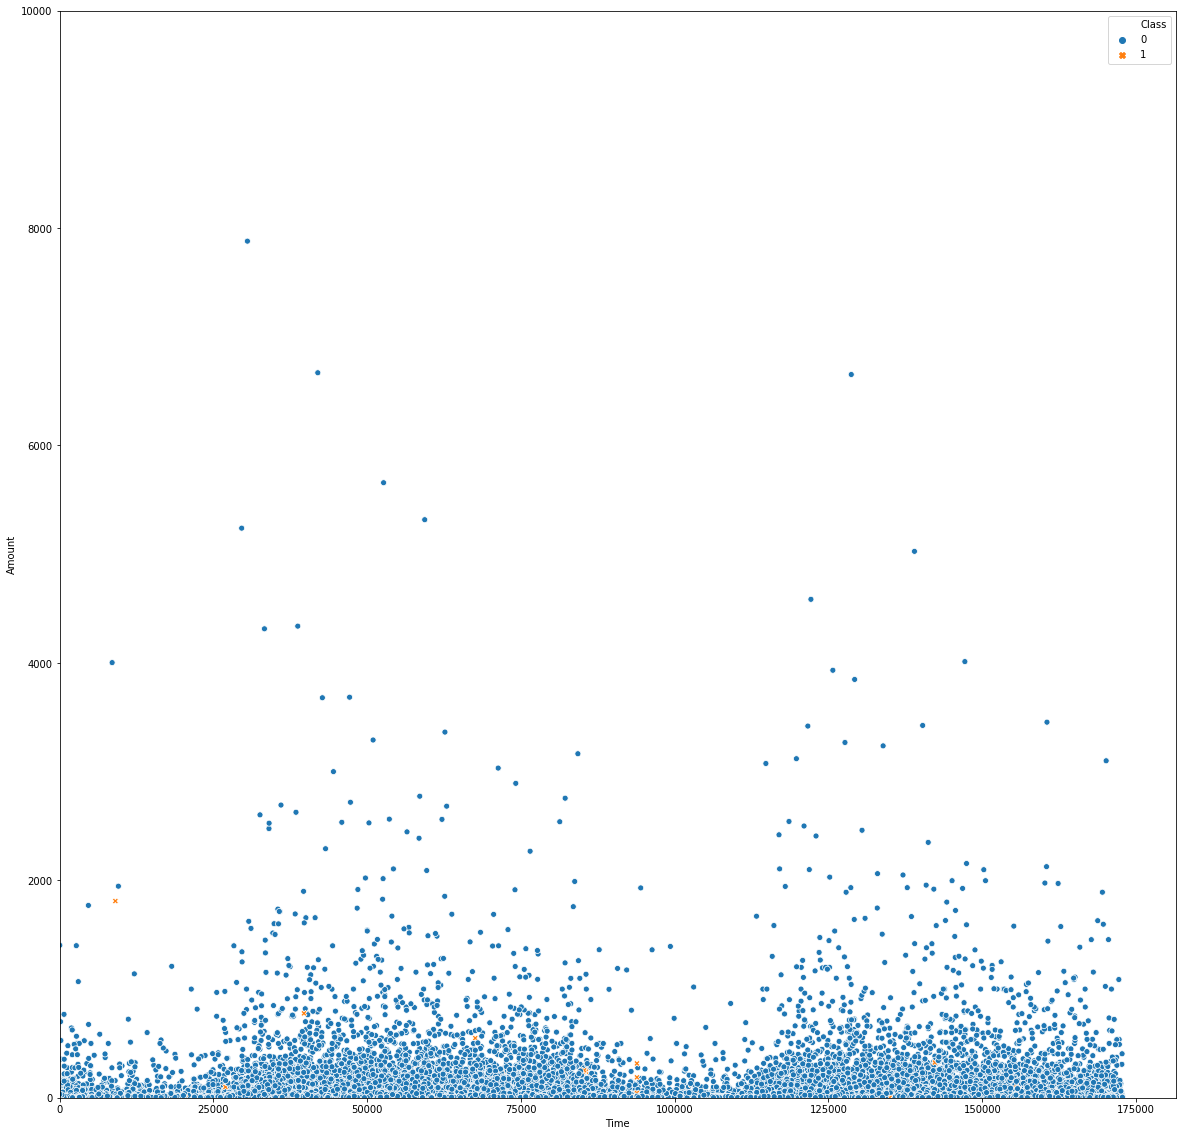

In [10]:
##visualising the data
plt.figure(figsize=(20,20))
sns.scatterplot(x="Time",y="Amount",hue="Class",style="Class",data=data1)
plt.xlim(0,None)
plt.ylim(0,10000)

We can see the dataset has very less true cases , we have comparativily very large set of False cases.To work on this skew dataset we can use logistic regression and F1 score to evaluate the performance 

In [11]:
##To get an idea about how many true cases we have , because its a skew class
data1[data1['Class']==1].V1.count()

43

 # Feature selection and Prediction
 
 We extract the labels from the dataset ,that is the 'Class' and use the rest of the columns as features we do the preporcessing and set X and Y

In [12]:
##getting the feature and the labels for the model
y=data1['Class']
X=data1.drop(labels='Class',axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,Amount
117155,74558.0,1.213180,0.551819,-0.352811,0.862103,0.071459,-1.131395,0.317008,-0.192824,-0.166324,-0.638012,0.604210,0.049406,-0.252156,-0.942571,1.178433,0.076314,1.219153,-0.401820,0.76
251706,155465.0,0.240972,-0.599339,0.692797,-2.627038,-0.884317,-0.189272,-0.534439,0.037629,-1.836765,1.154029,0.153890,-0.752855,-0.138160,-0.427666,-1.089472,-0.174528,0.032349,0.703605,17.40
7269,9669.0,1.256593,0.063302,0.636210,-0.054558,-0.439048,-0.445847,-0.355395,-0.119706,1.334725,-0.437388,2.247861,-1.324987,2.454134,1.601115,-0.239463,0.636280,-0.042004,0.370748,7.63
44836,42103.0,-5.169763,2.876397,-4.066449,1.237000,-2.994690,-1.033955,-1.482310,3.283574,-0.268373,0.454531,-1.553677,0.573704,-1.024905,2.909715,1.022055,0.236904,1.482057,-0.200415,99.99
59991,49101.0,-0.966960,2.319381,-0.962121,0.274331,1.666068,-1.651697,1.633863,-0.436122,-0.042407,-1.003123,0.111443,-1.398399,-1.009796,-3.796289,0.549263,1.231039,2.158713,1.613581,0.99


In [13]:
#fitting the values in to the model and predict the values
clf=LogisticRegression()
clf.fit(X,y)
predict=clf.predict(X)

In [14]:
# checking the F1 score to optimise the model
print(classification_report(y,predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28438
          1       0.68      0.60      0.64        43

avg / total       1.00      1.00      1.00     28481



As we check the F1 score we might get it about 60%.We couldnt mention the F1 score exactly because we choose the randam samples every time we start this code so we'll end up in a different F1 score each time but this seems to be good based on the dataset we have. Now our model is trained and all set we can try this on a new test data and check

In [15]:
#preparing the test data
test_sample=file.sample(frac=0.2)
test_sample.shape

(56961, 31)

In [16]:
#preparing the data for the model
test_y=test_sample['Class']
test_X=dataCorrection(test_sample)
test_X=test_X.drop(columns='Class')

In [17]:
ans=clf.predict(test_X)

In [19]:
#comparing the F1 score of the model for test data
print(classification_report(ans,test_y))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56872
          1       0.60      0.62      0.61        89

avg / total       1.00      1.00      1.00     56961

